## Predicting Flight Ticket Prices

In [ ]:
# Author : Muttu manahalli
#Email :muttumanahali@amrgenix.com
# The Model is concerned with the flight price prediction

#### Import Libraries and Data

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import The Data Set
df= pd.read_excel('Data_Train.xlsx')

In [ ]:
# Displaying the initial rows of the dataset
print("Initial few rows of the dataset: ")
df.head(20)

Initial few rows of the dataset: 


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,Null,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,Null,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,Null,8625


In [ ]:
# Getting an overview of total no of rows and column in the dataset
print("\nOverview of the total no of rows and column:")
df.shape


Overview of the total no of rows and column:


(10683, 11)

In [ ]:
# Getting an overview of the features and their types in the dataset
print("\nOverview of the features and their types:")
df.info()


Overview of the features and their types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# Getting an overview of the dataset
print("\nOverview of the dataset:")
df.describe()


Overview of the dataset:


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
# Getting an overview of the dataset including all
print("\nOverview of the dataset:")
df.describe(include='all').T


Overview of the dataset:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,Null,8347,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Getting an overview of the dataset including Object Type
print("\nOverview of the dataset:")
df.describe(include='O').T


Overview of the dataset:


,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


##### TO FIND UNIQUE VALUES IN EACH COLUMN

In [ ]:
for i in df.columns:
    print(f"The Unique Values in feature {i} is",df[i].unique(),sep='\n')
    print("**********************************************************")

The Unique Values in feature Airline is
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
**********************************************************
The Unique Values in feature Date_of_Journey is
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
**********************************************************
The Unique Values in feature Source

#### Central Function to Prepare the Process data & Model data

In [ ]:
def preprocess(data):
    """
    Function to Process data and get the process data & Modeling data
    """
    df.dropna(inplace = True)
    df.drop_duplicates(inplace = True)

    df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
    df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
    df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
    df['weekday'] = pd.DatetimeIndex(df['Date_of_Journey']).weekday

    df['Total_Stops'] = df['Total_Stops'].replace('non-stop', '0')
    df['Total_Stops'] = df['Total_Stops'].replace('1 stop', '1')
    df['Total_Stops'] = df['Total_Stops'].replace('2 stops', '2')
    df['Total_Stops'] = df['Total_Stops'].replace('3 stops', '3')
    df['Total_Stops'] = df['Total_Stops'].replace('4 stops', '4')

    df['Destination'] = np.where(df['Destination'] == 'New Delhi', 'Delhi', df['Destination'])
    df['Airline'] = np.where(df['Airline'] == 'Jet Airways Business','Jet Airways',df['Airline'])
    df['Airline'] = np.where(df['Airline'] == 'Vistara Premium economy','Vistara',df['Airline'])
    df['Airline'] = np.where(df['Airline'] == 'Multiple carriers Premium economy','Multiple carriers',df['Airline'])


    arrival_time = []
    for i in data["Arrival_Time"]:
        arrival_time.append(i[:5])
    df['Arrival_Time'] = arrival_time
    df['Arrival_Time_hour'] = pd.DatetimeIndex(df['Arrival_Time']).hour
    df['Arrival_Time_minutes'] = pd.DatetimeIndex(df['Arrival_Time']).minute

    df['Duration_Total_Hour'] = df['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval)

    data1 = pd.get_dummies(data, prefix=['Airline','Source','Destination'],columns = ['Airline','Source','Destination'], drop_first = True)
    data1.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Additional_Info','Route'], axis =1, inplace = True)
    return data, data1

In [ ]:
### Get The EDA & Model Data
data_eda, data_model = preprocess(df)

In [ ]:
data_eda

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,weekday,Arrival_Time_hour,Arrival_Time_minutes,Duration_Total_Hour
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,0,Null,3897,24,3,6,1,10,2.833333
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,7662,1,5,2,13,15,7.416667
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,Null,13882,9,6,6,4,25,19.000000
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,Null,6218,12,5,6,23,30,5.416667
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,Null,13302,1,3,4,21,35,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,Null,4107,9,4,1,22,25,2.500000
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,Null,4145,27,4,5,23,20,2.583333
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,Null,7229,27,4,5,11,20,3.000000
10681,Vistara,2019-03-01,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,Null,12648,1,3,4,14,10,2.666667


In [ ]:
data_model

,Duration,Total_Stops,Price,day,month,weekday,Arrival_Time_hour,Arrival_Time_minutes,Duration_Total_Hour,Airline_Air India,...,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2h 50m,0,3897,24,3,6,1,10,2.833333,False,...,False,False,False,False,False,False,False,True,False,False
1,7h 25m,2,7662,1,5,2,13,15,7.416667,True,...,False,False,False,False,True,False,False,False,False,False
2,19h,2,13882,9,6,6,4,25,19.000000,False,...,False,False,False,True,False,False,True,False,False,False
3,5h 25m,1,6218,12,5,6,23,30,5.416667,False,...,False,False,False,False,True,False,False,False,False,False
4,4h 45m,1,13302,1,3,4,21,35,4.750000,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,4107,9,4,1,22,25,2.500000,False,...,False,False,False,False,True,False,False,False,False,False
10679,2h 35m,0,4145,27,4,5,23,20,2.583333,True,...,False,False,False,False,True,False,False,False,False,False
10680,3h,0,7229,27,4,5,11,20,3.000000,False,...,False,False,False,False,False,False,False,True,False,False
10681,2h 40m,0,12648,1,3,4,14,10,2.666667,False,...,False,True,False,False,False,False,False,True,False,False


#### Univariate Exploratory Data Analysis

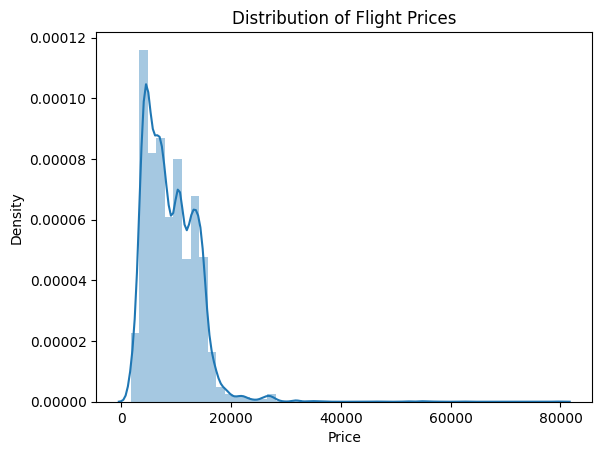

In [ ]:
# Histogram for 'price'
sns.distplot(data_eda['Price'])
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

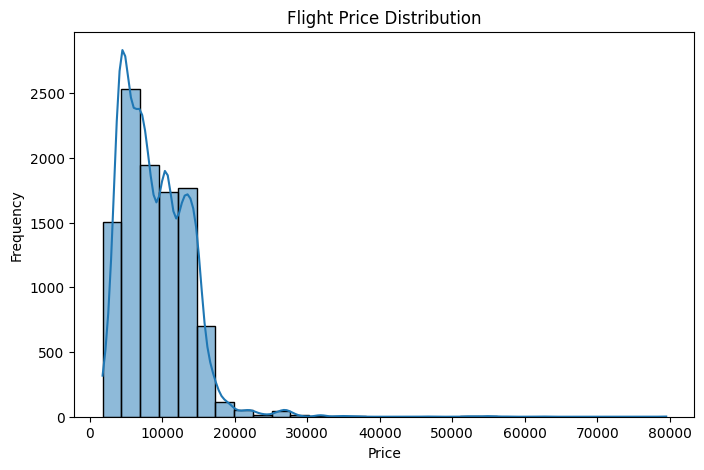

In [ ]:
# Create a histogram to visualize the distribution of flight prices
plt.figure(figsize=(8, 5))
sns.histplot(data_eda['Price'], kde=True, bins=30)
plt.title("Flight Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

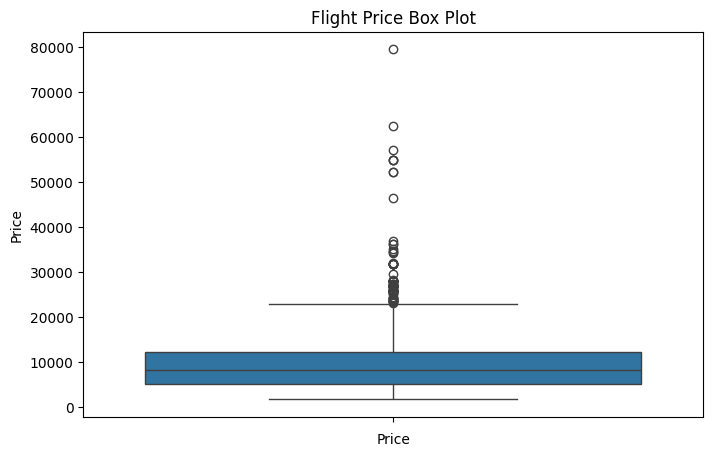

In [ ]:
# Create a box plot to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data_eda['Price'])
plt.title("Flight Price Box Plot")
plt.xlabel("Price")
plt.show()

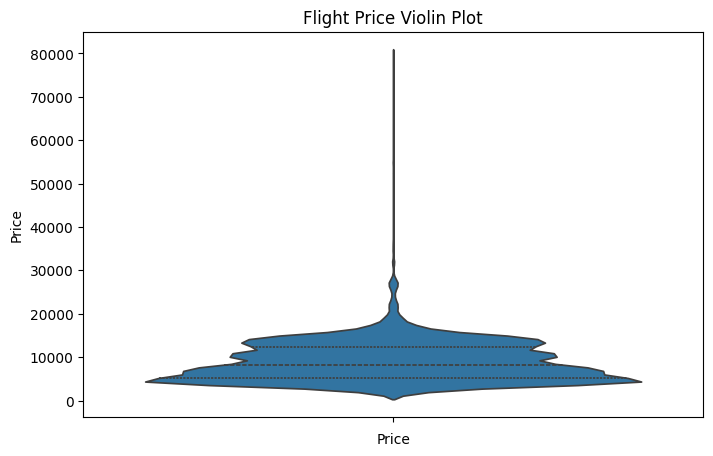

In [ ]:
# Create a violin plot for a more detailed distribution view
plt.figure(figsize=(8, 5))
sns.violinplot(data_eda["Price"], inner="quartile")
plt.title("Flight Price Violin Plot")
plt.xlabel("Price")
plt.show()

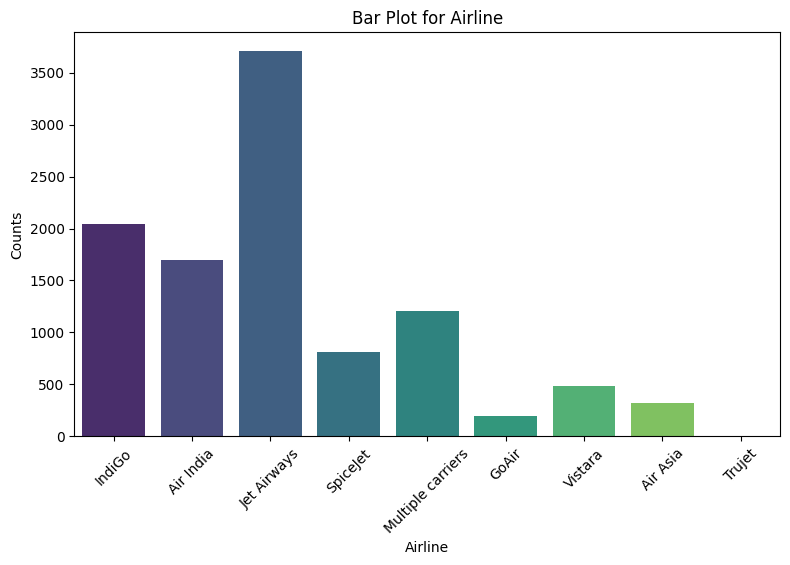

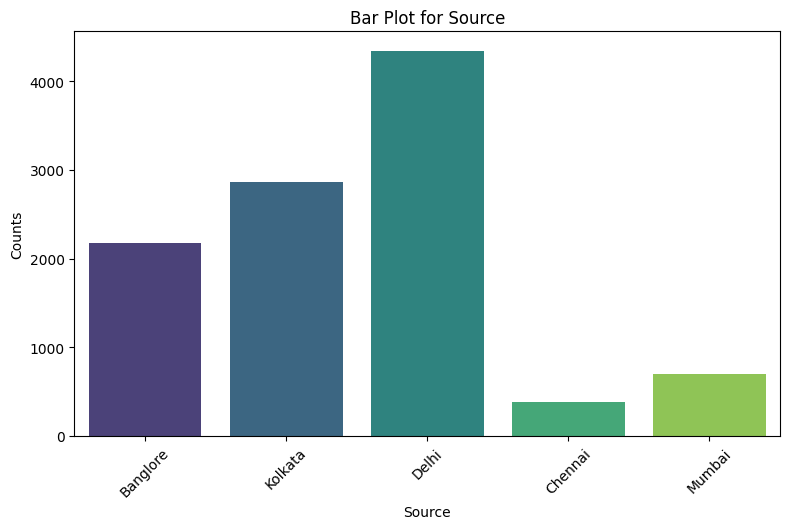

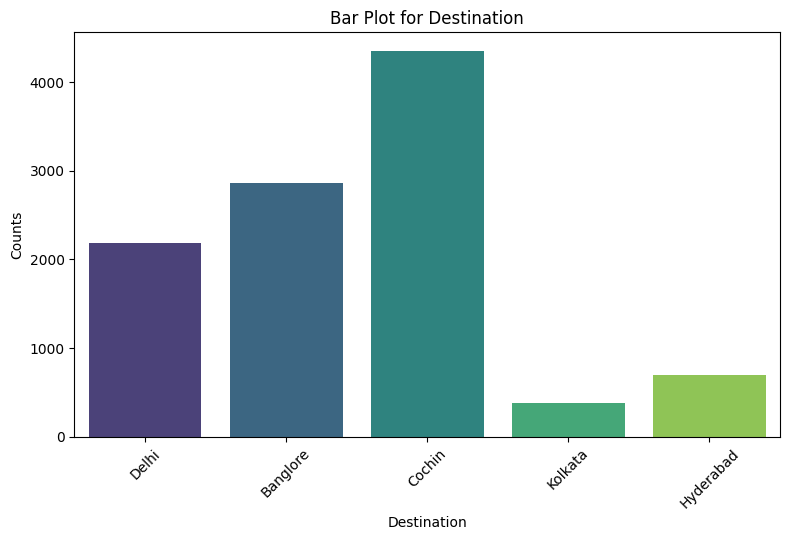

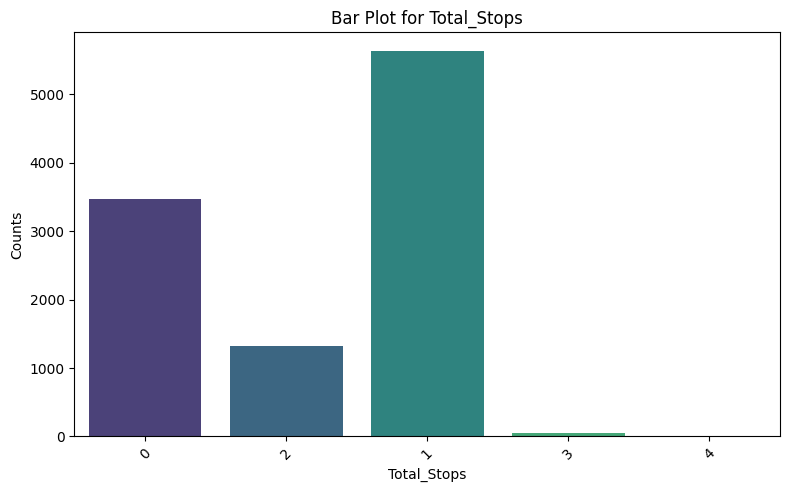

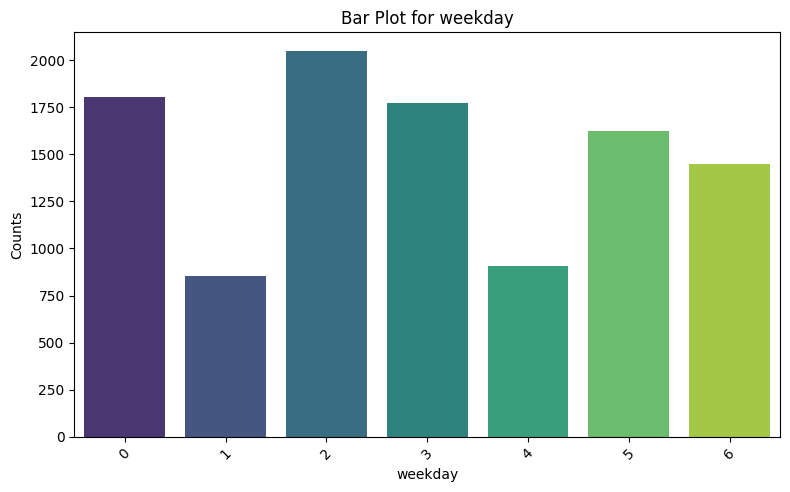

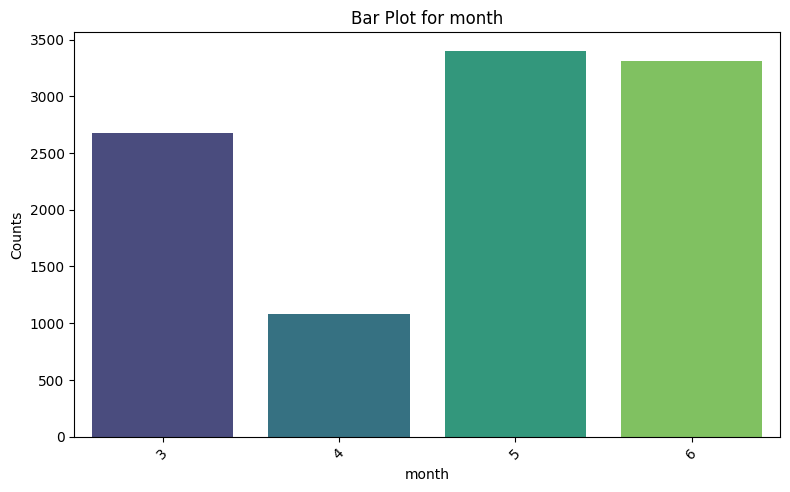

In [ ]:
#Airline	Date_of_Journey	Source	Destination	Route	Dep_Time	Arrival_Time	Duration	Total_Stops	Additional_Info	Price	day	month	weekday	Arrival_Time_hour	Arrival_Time_minutes	Duration_Total_Hour
seg_data = ['Airline','Source','Destination','Total_Stops','weekday','month']
for edcol in seg_data:
    plt.figure(figsize=(8, 5))
    # Creating a count plot using seaborn
    sns.countplot(x=data_eda[edcol], palette="viridis")

    plt.xlabel(edcol)
    plt.ylabel('Counts')
    plt.title(f'Bar Plot for {edcol}')

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.xticks(rotation=45)
    # Display the plot
    plt.show()
    #print(data_eda[edcol].value_counts())
    #print(data_eda[edcol].index)
    #print(data_eda[edcol].values)

In [ ]:
# Generate a count plot to visualize the frequency of unique flight prices


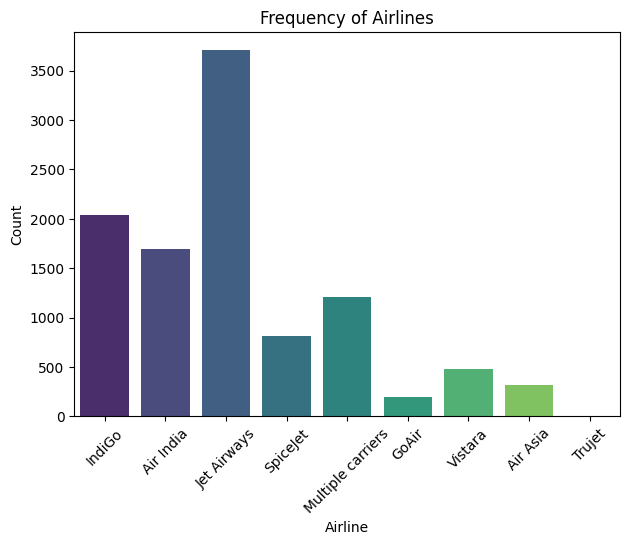

In [ ]:
# Univariate EDA for categorical variables

# Count plot for 'airline'
sns.countplot(x=data_eda['Airline'], palette="viridis")
plt.title('Frequency of Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

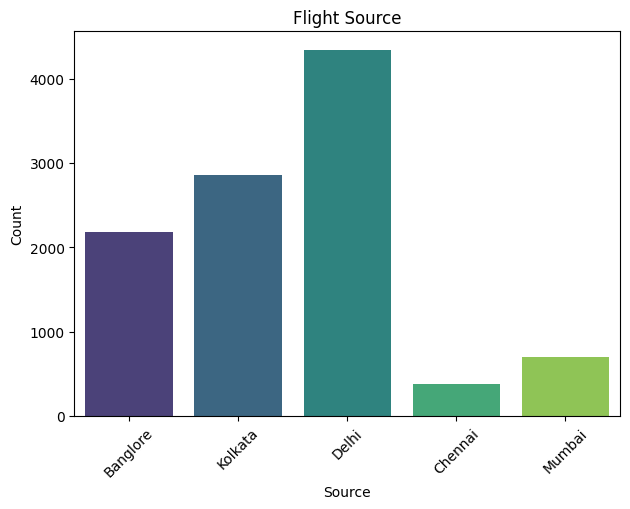

In [ ]:
# Univariate EDA for categorical variables

# Count plot for 'Source'
sns.countplot(x=data_eda['Source'], palette="viridis")
plt.title('Flight Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<bound method IndexOpsMixin.value_counts of 0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10462, dtype: object>


<Axes: xlabel='Source', ylabel='count'>

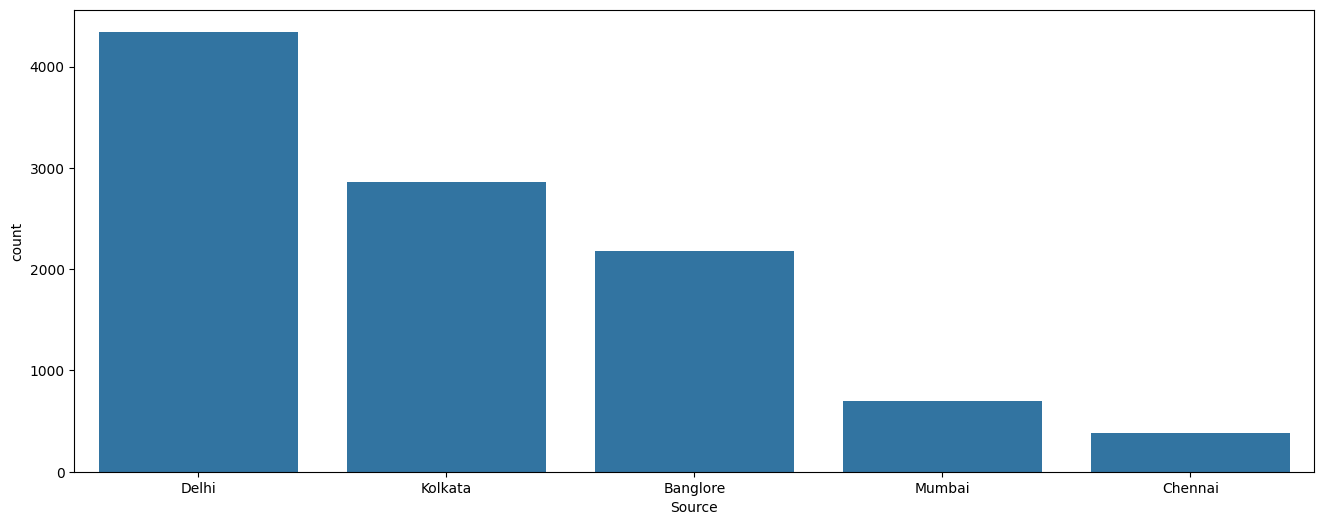

In [ ]:
plt.figure(figsize=(16,6))
print(data_eda['Source'].value_counts)
sns.countplot(x="Source",data=data_eda,order=data_eda['Source'].value_counts().index)

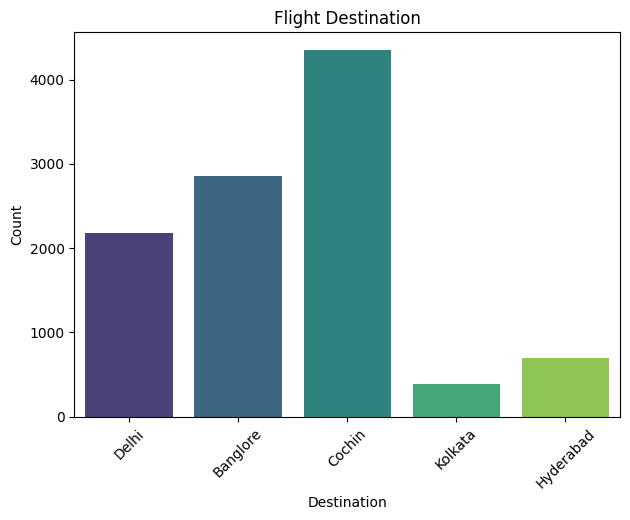

In [ ]:
# Univariate EDA for categorical variables

# Count plot for 'Source'
sns.countplot(x=data_eda['Destination'], palette="viridis")
plt.title('Flight Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

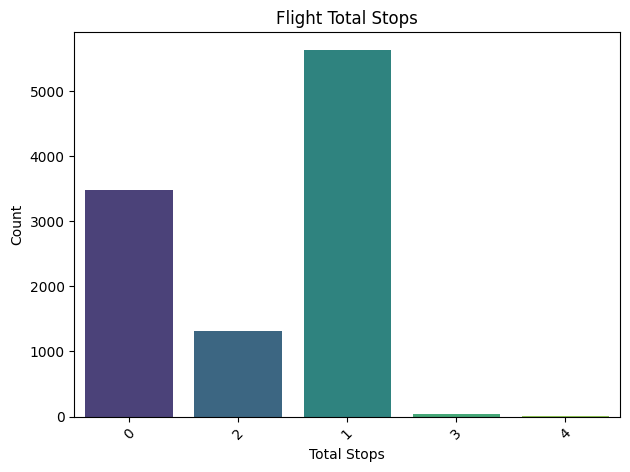

In [ ]:
# Univariate EDA for categorical variables

# Count plot for 'Source'
sns.countplot(x=data_eda['Total_Stops'], palette="viridis")
plt.title('Flight Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis

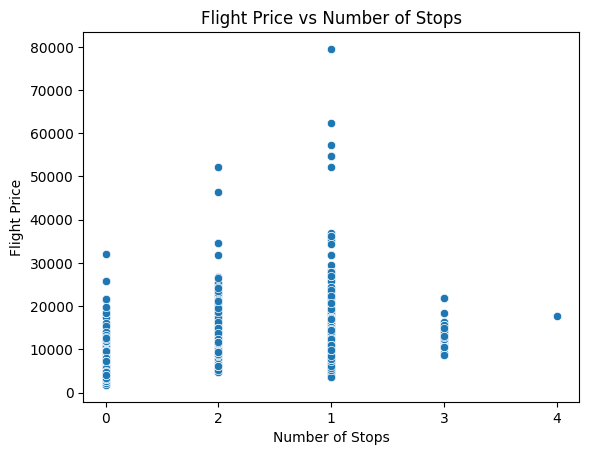

In [ ]:
#relationship between the flight price and the number of stops.
sns.scatterplot(x='Total_Stops', y='Price', data=data_eda)
plt.xlabel('Number of Stops')
plt.ylabel('Flight Price')
plt.title('Flight Price vs Number of Stops')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Average Flight Price by Airline')

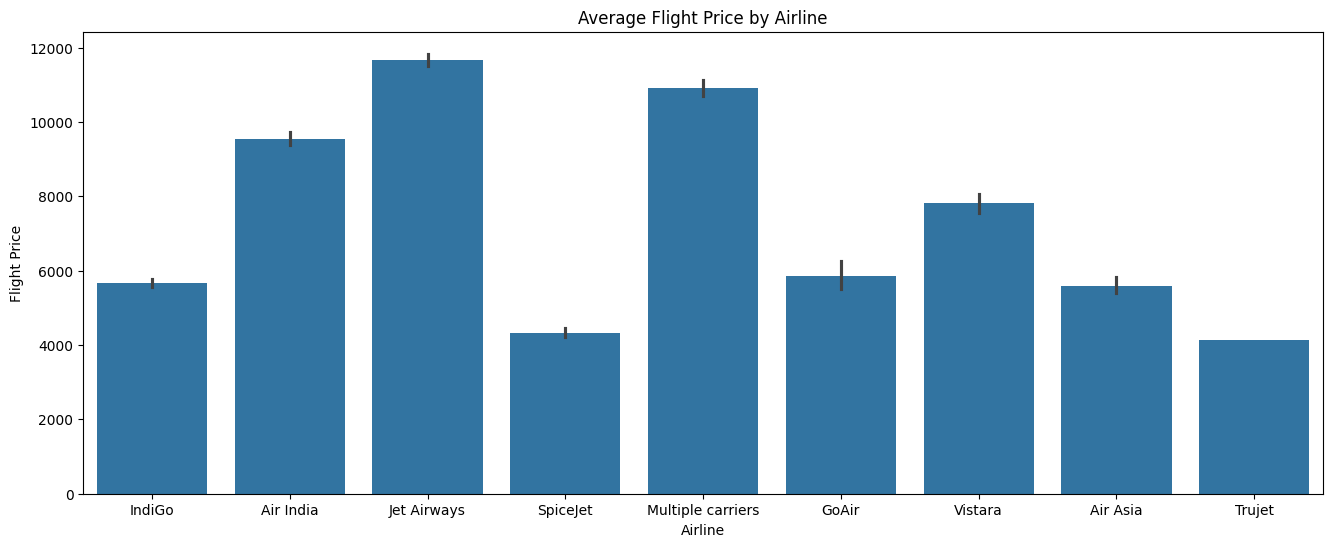

In [ ]:
# Average Price Duistrubution as per airline
plt.figure(figsize=(16,6))
sns.barplot(x="Airline",y='Price',data=data_eda)
plt.xlabel('Airline')
plt.ylabel('Flight Price')
plt.title('Average Flight Price by Airline')

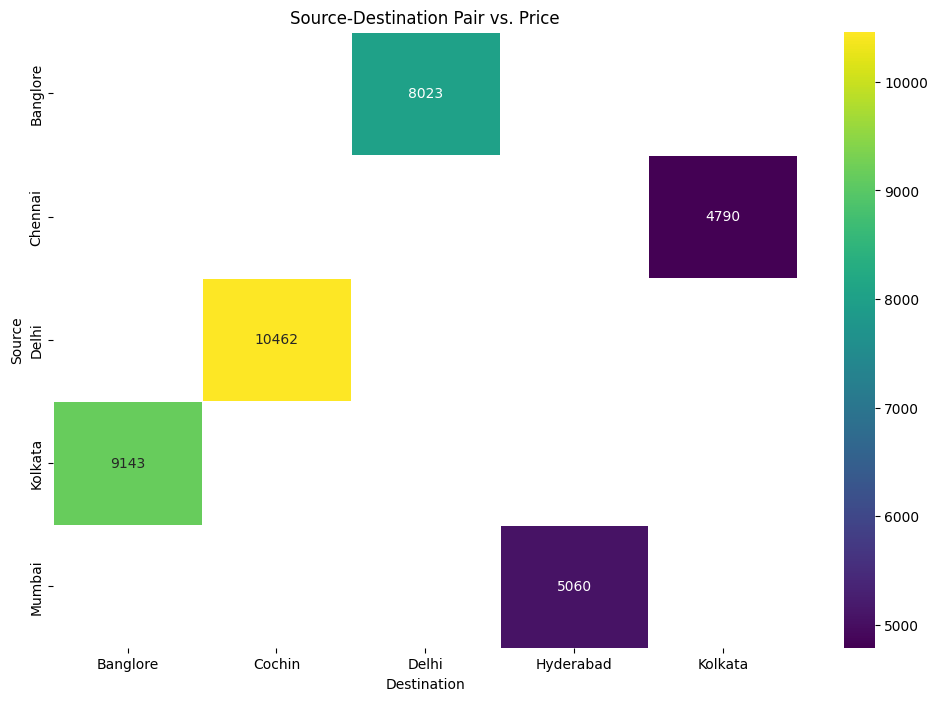

In [ ]:
## Example 2: Source-Destination Pair vs. Price
plt.figure(figsize=(12, 8))
heatmap_data = data_eda.pivot_table(index='Source', columns='Destination', values='Price', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Source-Destination Pair vs. Price')
plt.show()

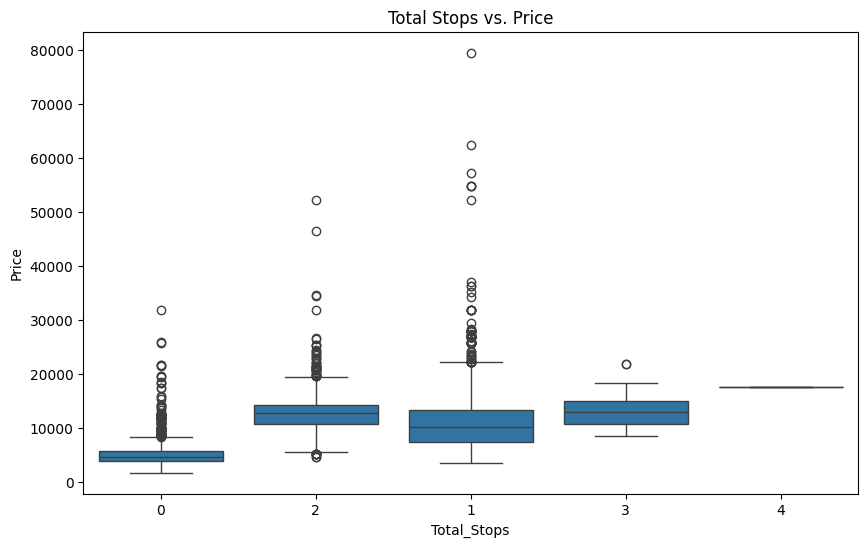

In [ ]:
# Example 3: Total Stops vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=data_eda)
plt.title('Total Stops vs. Price')
plt.show()

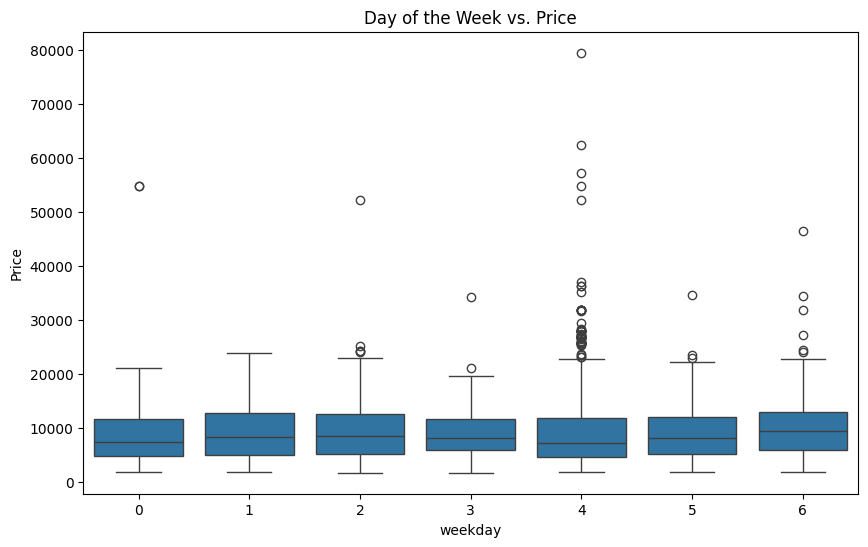

In [ ]:
# Example 4: Day of the Week vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='Price', data=data_eda)
plt.title('Day of the Week vs. Price')
plt.show()

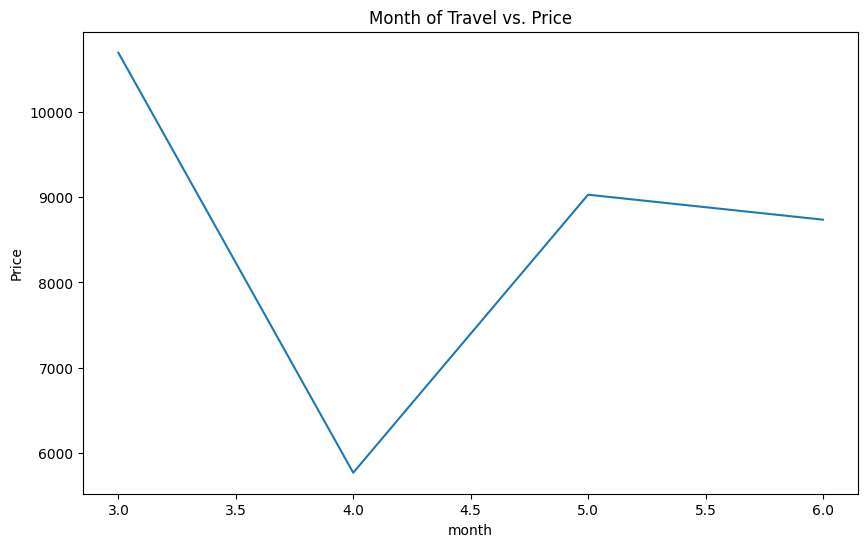

In [ ]:
# Example 5: Month of Travel vs. Price
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='Price', data=data_eda, estimator='mean', ci=None)
plt.title('Month of Travel vs. Price')
plt.show()

#### Multivariate Analysis

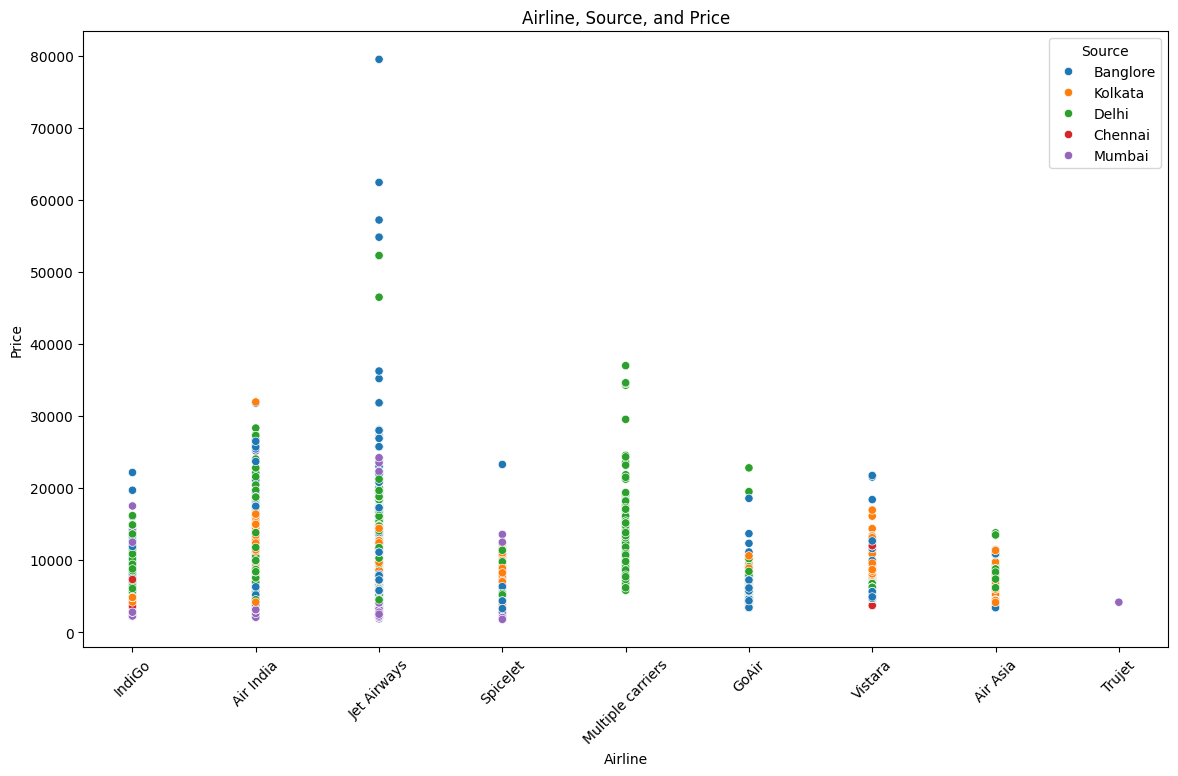

In [ ]:
# Airline, Source, and Price
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Airline', y='Price', hue='Source', data=data_eda)
plt.xticks(rotation=45)
plt.title('Airline, Source, and Price')
plt.show()

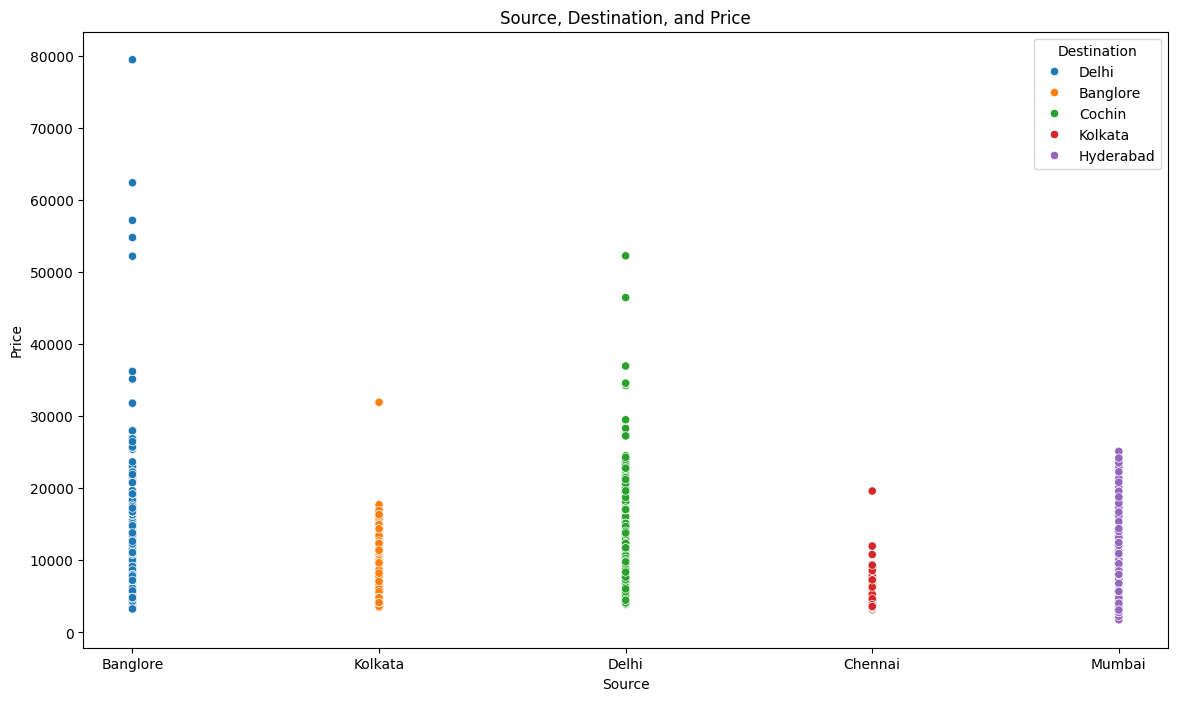

In [ ]:
#Source, Destination, and Price
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Source', y='Price', hue='Destination', data=data_eda)
plt.title('Source, Destination, and Price')
plt.show()

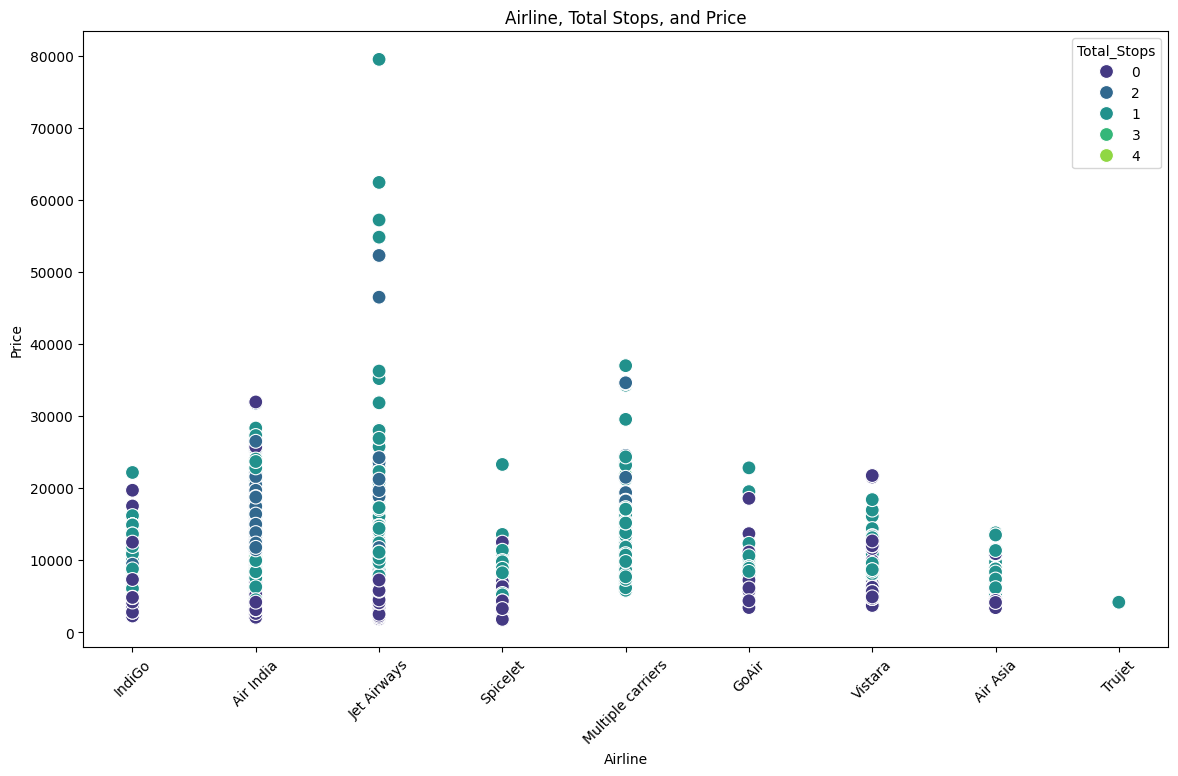

In [ ]:
#  Airline, Total Stops, and Price
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Airline', y='Price', hue='Total_Stops', data=data_eda, palette='viridis', s=100)
plt.xticks(rotation=45)
plt.title('Airline, Total Stops, and Price')
plt.show()

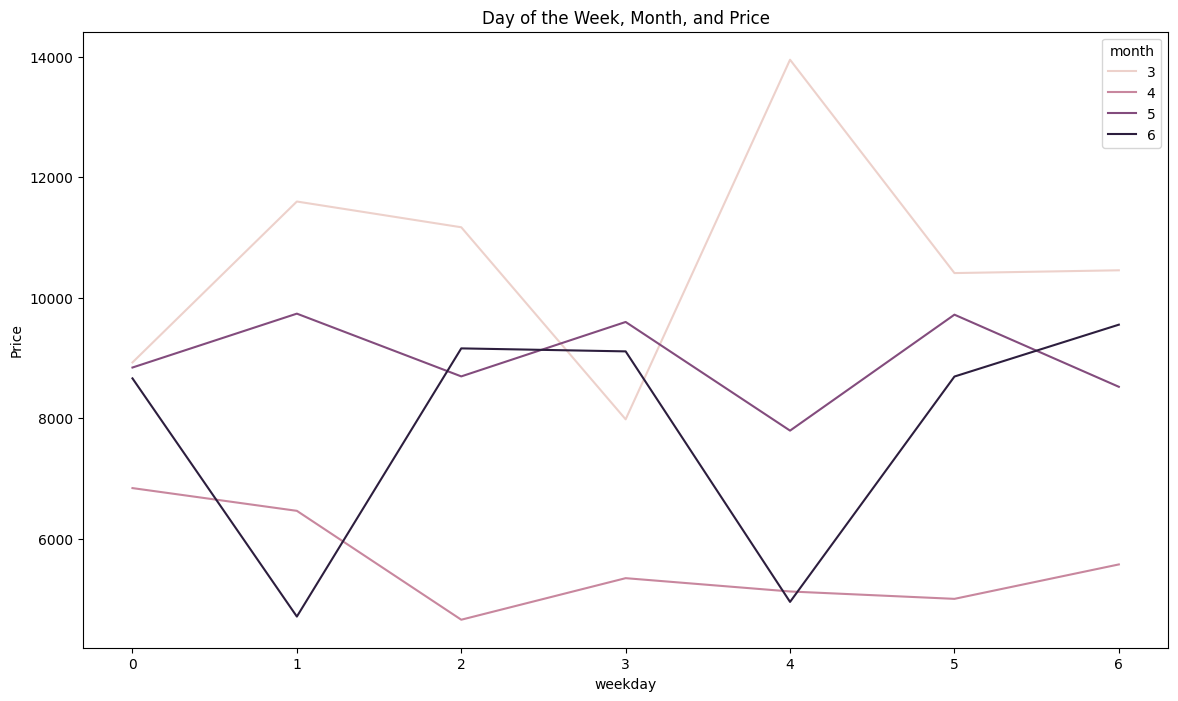

In [ ]:
#  Day of the Week, Month, and Price
plt.figure(figsize=(14, 8))
sns.lineplot(x='weekday', y='Price', hue='month', data=data_eda, estimator='mean', ci=None)
plt.title('Day of the Week, Month, and Price')
plt.show()

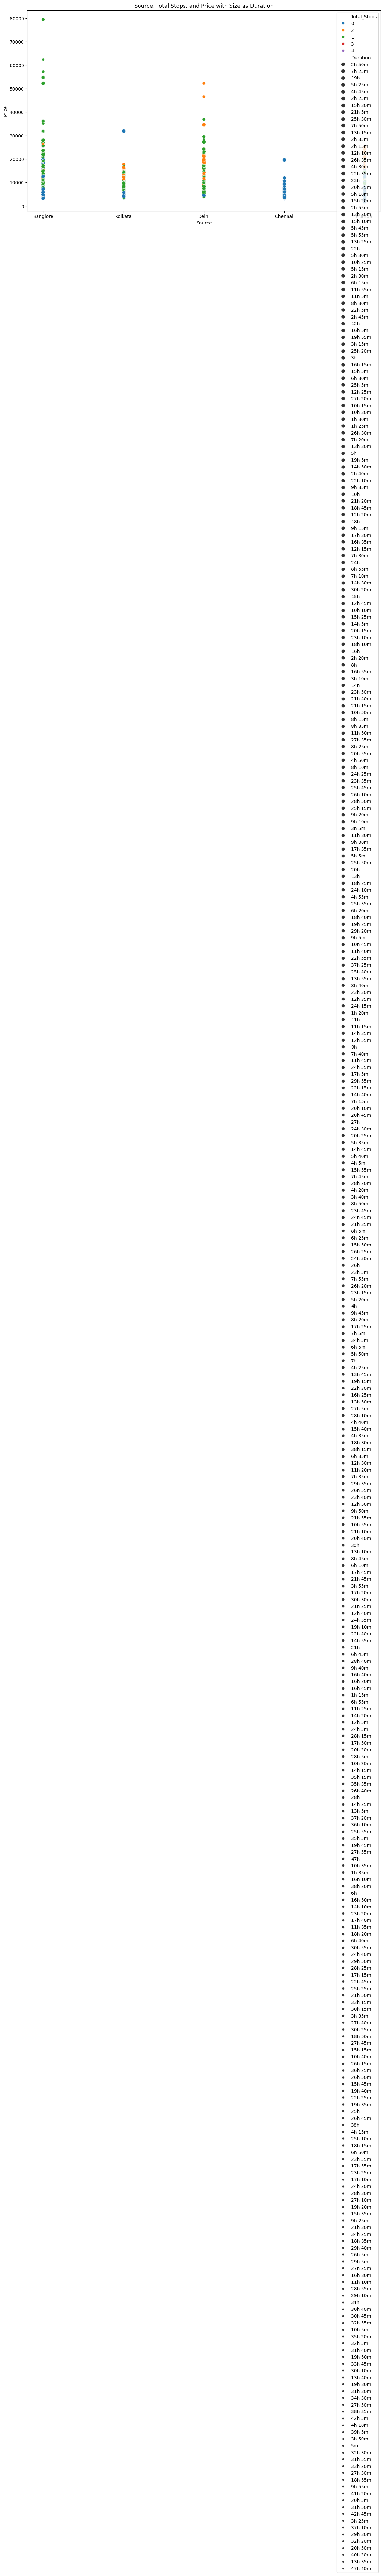

In [ ]:
#  Source, Total Stops, and Price with Size as Duration
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Source', y='Price', hue='Total_Stops', size='Duration', data=data_eda)
plt.title('Source, Total Stops, and Price with Size as Duration')
plt.show()

### Features:

In [ ]:
data_eda.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'day', 'month', 'weekday',
       'Arrival_Time_hour', 'Arrival_Time_minutes', 'Duration_Total_Hour'],
      dtype='object')

In [ ]:
data_model

,Duration,Total_Stops,Price,day,month,weekday,Arrival_Time_hour,Arrival_Time_minutes,Duration_Total_Hour,Airline_Air India,...,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2h 50m,0,3897,24,3,6,1,10,2.833333,False,...,False,False,False,False,False,False,False,True,False,False
1,7h 25m,2,7662,1,5,2,13,15,7.416667,True,...,False,False,False,False,True,False,False,False,False,False
2,19h,2,13882,9,6,6,4,25,19.000000,False,...,False,False,False,True,False,False,True,False,False,False
3,5h 25m,1,6218,12,5,6,23,30,5.416667,False,...,False,False,False,False,True,False,False,False,False,False
4,4h 45m,1,13302,1,3,4,21,35,4.750000,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,4107,9,4,1,22,25,2.500000,False,...,False,False,False,False,True,False,False,False,False,False
10679,2h 35m,0,4145,27,4,5,23,20,2.583333,True,...,False,False,False,False,True,False,False,False,False,False
10680,3h,0,7229,27,4,5,11,20,3.000000,False,...,False,False,False,False,False,False,False,True,False,False
10681,2h 40m,0,12648,1,3,4,14,10,2.666667,False,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
X = data_model.drop(['Price','Duration'],axis=1)
y = data_model['Price']

### Modeling:

In [ ]:
from sklearn.model_selection import train_test_split

#### Splitting the data

In [ ]:
# 60% Train - 20% Val - 20% Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

### Feature Selection

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
extractor = ExtraTreesRegressor()

In [ ]:
extractor.fit(X_train,y_train)

ExtraTreesRegressor()

In [ ]:
x_columns = X_train.columns
feature_rank = pd.DataFrame({'feature':x_columns, 'importance':extractor.feature_importances_})

In [ ]:
feature_rank = feature_rank.sort_values('importance',ascending =  False)

<Axes: xlabel='importance', ylabel='feature'>

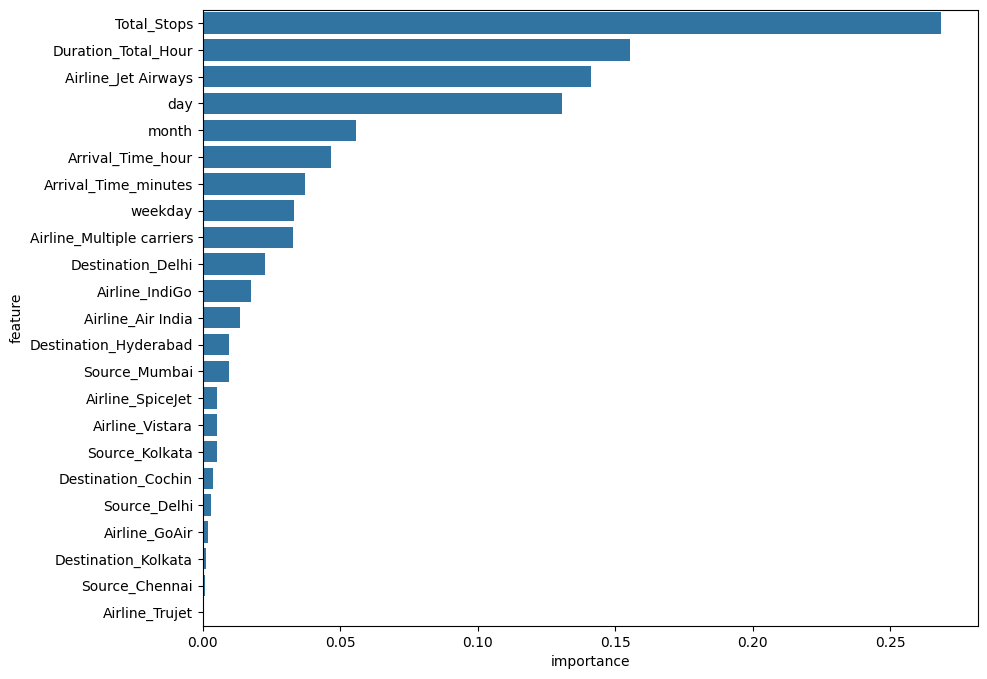

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='importance',y='feature',data=feature_rank)

In [ ]:
feature_rank['cumsum'] = feature_rank['importance'].cumsum()*100

In [ ]:
feature_rank.head(15)

,feature,importance,cumsum
0,Total_Stops,0.268368,26.836764
6,Duration_Total_Hour,0.155283,42.365039
10,Airline_Jet Airways,0.141135,56.478513
1,day,0.130544,69.532864
2,month,0.055711,75.103988
4,Arrival_Time_hour,0.046794,79.783413
5,Arrival_Time_minutes,0.037092,83.492642
3,weekday,0.033138,86.806428
11,Airline_Multiple carriers,0.032898,90.096257
20,Destination_Delhi,0.022608,92.357050


## Model Building

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

### Defining a function to get metrics for val set

In [ ]:
def predict(ml_model):
    print('Model name is: {}'.format(ml_model))
    model = ml_model.fit(X_train,y_train)
    print("Training Score: {}".format(model.score(X_train,y_train)))

    predictions = model.predict(X_test)

    r2score = r2_score (y_test,predictions)
    print('R2 Score is: {}'.format(r2score))


    print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

def predict(ml_model):
    print('Model name is: {}'.format(ml_model))
    model = ml_model.fit(X_train,y_train)
    print("Training Score: {}".format(model.score(X_train,y_train)))

    predictions = model.predict(X_test)

    r2score = r2_score (y_test,predictions)
    print('R2 Score is: {}'.format(r2score))


    print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

# Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

predict(LinearRegression()) # Now LinearRegression is defined and should work

Model name is: LinearRegression()
Training Score: 0.5611562109363095
R2 Score is: 0.5713845353463043
MAE: 2025.991457679277
MSE: 8936750.897874985
RMSE: 2989.4398970166612


In [ ]:
from sklearn.tree import DecisionTreeRegressor # Importing the DecisionTreeRegressor class

from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

def predict(ml_model):
    print('Model name is: {}'.format(ml_model))
    model = ml_model.fit(X_train,y_train)
    print("Training Score: {}".format(model.score(X_train,y_train)))

    predictions = model.predict(X_test)

    r2score = r2_score (y_test,predictions)
    print('R2 Score is: {}'.format(r2score))


    print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

predict(DecisionTreeRegressor()) # Now DecisionTreeRegressor is defined and should work

Model name is: DecisionTreeRegressor()
Training Score: 0.969740512514991
R2 Score is: 0.6451138944601463
MAE: 1500.883221850613
MSE: 7399473.383185352
RMSE: 2720.197305929361


In [ ]:
from sklearn.ensemble import RandomForestRegressor # Importing the RandomForestRegressor class

from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

def predict(ml_model):
    print('Model name is: {}'.format(ml_model))
    model = ml_model.fit(X_train,y_train)
    print("Training Score: {}".format(model.score(X_train,y_train)))

    predictions = model.predict(X_test)

    r2score = r2_score (y_test,predictions)
    print('R2 Score is: {}'.format(r2score))


    print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

predict(RandomForestRegressor()) # Now RandomForestRegressor is defined and should work

Model name is: RandomForestRegressor()
Training Score: 0.9523391668311612
R2 Score is: 0.7861081466472692
MAE: 1241.4533666319878
MSE: 4459704.25738739
RMSE: 2111.8011879406145


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':[100,200,300,400,500], 'max_features' : ['auto','sqrt'], 'max_depth' : [5,10,15,20]}
rf = RandomForestRegressor()
rf_cv = RandomizedSearchCV(rf,params,cv=10,verbose = True, n_jobs=-1)
rf_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=True)

In [ ]:
rf_cv.best_params_

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 15}

In [ ]:
predict(RandomForestRegressor(n_estimators = 400, max_features = 'sqrt',max_depth = 15))

Model name is: RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=400)
Training Score: 0.9194682062254268
R2 Score is: 0.7980506174611651
MAE: 1307.047195276771
MSE: 4210700.440282562
RMSE: 2051.9991326222735


In [ ]:
!pip install pandas numpy scikit-learn joblib xgboost


In [ ]:
import pandas as pd
import numpy as np

# Load dataset using pd.read_excel() instead of pd.read_csv()
df = pd.read_excel("/content/Data_Train.xlsx")

# Display first few rows
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [ ]:
!pip install flask flask-ngrok joblib


In [ ]:
import pandas as pd

# Load dataset (Change the filename if necessary)
file_path = "/content/Data_Train.xlsx"  # Replace with your actual file name
df = pd.read_excel(file_path)

# Print column names to check for mismatches
print("Column Names:", df.columns.tolist())

# Strip spaces from column names (Fixes hidden spaces)
df.columns = df.columns.str.strip()

# Check if 'Date_of_Journey' column exists
if 'Date_of_Journey' not in df.columns:
    print("⚠️ 'Date_of_Journey' column NOT FOUND in the dataset!")
    print("Available Columns:", df.columns.tolist())
else:
    print("✅ 'Date_of_Journey' column is present.")

# Display the first few rows
print(df.head())

# Optional: If Date_of_Journey contains null values, fill or drop them
df['Date_of_Journey'].fillna("Unknown", inplace=True)  # Replace missing dates with "Unknown"


Column Names: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price']
✅ 'Date_of_Journey' column is present.
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop           Null    3897  
1    05:50         13:15   7h 25m     2 stops            Null   7662  
2    09:25  04:25 10 Jun      19h     2 stops            Null  13882  
3    18:05         23:30   5h 25m      1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data (replace with actual file)
df = pd.read_excel("/content/Data_Train.xlsx")

# ✅ Convert Date_of_Journey into day and month
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format='%d/%m/%Y', errors='coerce')
df["Journey_Day"] = df["Date_of_Journey"].dt.day
df["Journey_Month"] = df["Date_of_Journey"].dt.month

# Drop original Date_of_Journey
df.drop(["Date_of_Journey"], axis=1, inplace=True)

# ✅ Convert Dep_Time & Arrival_Time to hours and minutes
df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"], errors='coerce').dt.hour
df["Dep_Min"] = pd.to_datetime(df["Dep_Time"], errors='coerce').dt.minute
df.drop(["Dep_Time"], axis=1, inplace=True)

df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"], errors='coerce').dt.hour
df["Arrival_Min"] = pd.to_datetime(df["Arrival_Time"], errors='coerce').dt.minute
df.drop(["Arrival_Time"], axis=1, inplace=True)

# ✅ Convert Duration into total minutes
def convert_duration(duration):
    hours = 0
    minutes = 0
    if "h" in duration:
        hours = int(duration.split("h")[0])  # Extract hours
    if "m" in duration:
        minutes = int(duration.split("m")[0].split()[-1])  # Extract minutes
    return hours * 60 + minutes  # Convert total duration to minutes

df["Duration"] = df["Duration"].apply(convert_duration)

# ✅ Encode categorical variables
label_encoders = {}
for col in ["Airline", "Source", "Destination", "Total_Stops"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string if needed
    label_encoders[col] = le  # Save encoder for later use

# ✅ Drop unneeded columns
df.drop(["Route", "Additional_Info"], axis=1, inplace=True)

print(df.head())


   Airline  Source  Destination  Duration  Total_Stops  Price  Journey_Day  \
0        3       0            5       170            5   3897           24   
1        1       3            0       445            1   7662            1   
2        4       2            1      1140            1  13882            9   
3        3       3            0       325            0   6218           12   
4        3       0            5       285            0  13302            1   

   Journey_Month  Dep_Hour  Dep_Min  Arrival_Hour  Arrival_Min  
0              3        22       20             1           10  
1              5         5       50            13           15  
2              6         9       25             4           25  
3              5        18        5            23           30  
4              3        16       50            21           35  


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["Price"])  # Independent variables
y = df["Price"]  # Dependent variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (8546, 11)
Testing data size: (2137, 11)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 1202.830656098711
Mean Squared Error: 4372779.975192196
R2 Score: 0.7933856081753348


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, "flight_price_model.pkl")
print("Model saved as flight_price_model.pkl")


Model saved as flight_price_model.pkl


In [ ]:
# Load the trained model
loaded_model = joblib.load("flight_price_model.pkl")

# Example prediction on a new flight (replace with real data)
new_flight_data = [[3, 6, 14, 30, 16, 55, 320, 2, 0, 3, 1]]  # Sample input

predicted_price = loaded_model.predict(new_flight_data)
print("Predicted Flight Price:", predicted_price[0])


Predicted Flight Price: 7040.665666666667


# <h2>Feature Engineering / Data Preproccesing</h2>

---



In [ ]:
# Install required libraries
!pip install pandas numpy scikit-learn xgboost tensorflow matplotlib seaborn openpyxl

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Load the dataset from Excel
file_path = "/content/Data_Train.xlsx"
df = pd.read_excel(file_path)

# Display first few rows of the dataset
print("Sample Data:")
print(df.head())

# --- Data Preprocessing ---
# Handle missing values
df.dropna(inplace=True)  # Remove missing values

# Convert 'Date_of_Journey' to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Weekday'] = df['Date_of_Journey'].dt.dayofweek
df.drop(['Date_of_Journey'], axis=1, inplace=True)  # Drop original column

# Convert 'Duration' (e.g., "2h 30m") into numeric (hours)
def convert_duration(duration):
    duration = duration.replace('h', '*60').replace('m', '').replace(' ', '+')
    return eval(duration) / 60  # Convert minutes to hours

df['Duration'] = df['Duration'].apply(convert_duration)

# Encode categorical features using Label Encoding
categorical_cols = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future use

# Standard Scaling for numerical features
scaler = StandardScaler()
df[['Duration', 'Price']] = scaler.fit_transform(df[['Duration', 'Price']])

# Define features and target
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n✅ Data Preprocessing Completed!")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Sample Data:
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


<ipython-input-5-89ad0c9e2544>:30: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])



✅ Data Preprocessing Completed!
Training samples: 8545, Testing samples: 2137


In [ ]:
# Convert 'Dep_Time' and 'Arrival_Time' into hour and minute features
df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_Minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_Minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

# Drop original columns
df.drop(["Dep_Time", "Arrival_Time"], axis=1, inplace=True)


<ipython-input-7-408feb6cb136>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
<ipython-input-7-408feb6cb136>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute
<ipython-input-7-408feb6cb136>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
<ipython-input-7-408feb6cb136>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsin

In [ ]:
# Convert 'Duration' to total minutes
def convert_duration(duration):
    if pd.isna(duration):  # Check if NaN, replace with "0h 0m"
        return 0
    duration = str(duration).split()  # Convert to string and split
    hours = int(duration[0][:-1]) if "h" in duration[0] else 0
    minutes = int(duration[1][:-1]) if len(duration) > 1 else 0
    return hours * 60 + minutes  # Convert to total minutes

# Apply function
df["Duration"] = df["Duration"].apply(convert_duration)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'Total_Stops' (if it's categorical)
df["Total_Stops"] = df["Total_Stops"].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=["Airline", "Source", "Destination"], drop_first=True)


In [ ]:
# Define X (features) and y (target)
X = df.drop("Price", axis=1)
y = df["Price"]

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score
print(f"✅ MSE: {mean_squared_error(y_test, y_pred)}")
print(f"✅ R² Score: {r2_score(y_test, y_pred)}")


✅ MSE: 0.3313643130852386
✅ R² Score: 0.6732101800199066


In [ ]:
print(df.columns)


Index(['Route', 'Duration', 'Additional_Info', 'Price', 'Day', 'Month',
       'Weekday', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Airline_1', 'Airline_2', 'Airline_3', 'Airline_4', 'Airline_5',
       'Airline_6', 'Airline_7', 'Airline_8', 'Airline_9', 'Airline_10',
       'Airline_11', 'Source_1', 'Source_2', 'Source_3', 'Source_4',
       'Destination_1', 'Destination_2', 'Destination_3', 'Destination_4',
       'Destination_5', 'Total_Stops_1', 'Total_Stops_2', 'Total_Stops_3',
       'Total_Stops_4'],
      dtype='object')


In [ ]:
X = df.drop(columns=["Price"])  # Features (exclude target variable)
y = df["Price"]  # Target variable (price prediction)


Linear Regression, Random Forest, and XGBoost:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train models
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"📊 {name} Performance:")
    print(f"   - MSE: {mse:.2f}")
    print(f"   - R² Score: {r2:.2f}")



🔹 Training Linear Regression...
📊 Linear Regression Performance:
   - MSE: 0.33
   - R² Score: 0.67

🔹 Training Random Forest...
📊 Random Forest Performance:
   - MSE: 0.08
   - R² Score: 0.92

🔹 Training XGBoost...
📊 XGBoost Performance:
   - MSE: 0.10
   - R² Score: 0.90


Save the Best Model


In [ ]:
import joblib

# Save the model (you can choose the best model based on R² score)
joblib.dump(models["Random Forest"], "flight_price_model.pkl")  # Example using Random Forest


['flight_price_model.pkl']

Make Predictions Using the Model
